In [2]:
%config InlineBackend.figure_format = 'retina'

import pymc3 as pm
import arviz as az
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [3]:
d = pd.read_csv("data/marriage.csv", sep=";")
d['MedianAgeMarriage_s'] = (d.MedianAgeMarriage - d.MedianAgeMarriage.mean()) / d.MedianAgeMarriage.std()
d['Divorce_s'] = (d.Divorce - d.Divorce.mean()) / d.Divorce.std()
d['Marriage_s'] = (d.Marriage - d.Marriage.mean()) / d.Marriage.std()


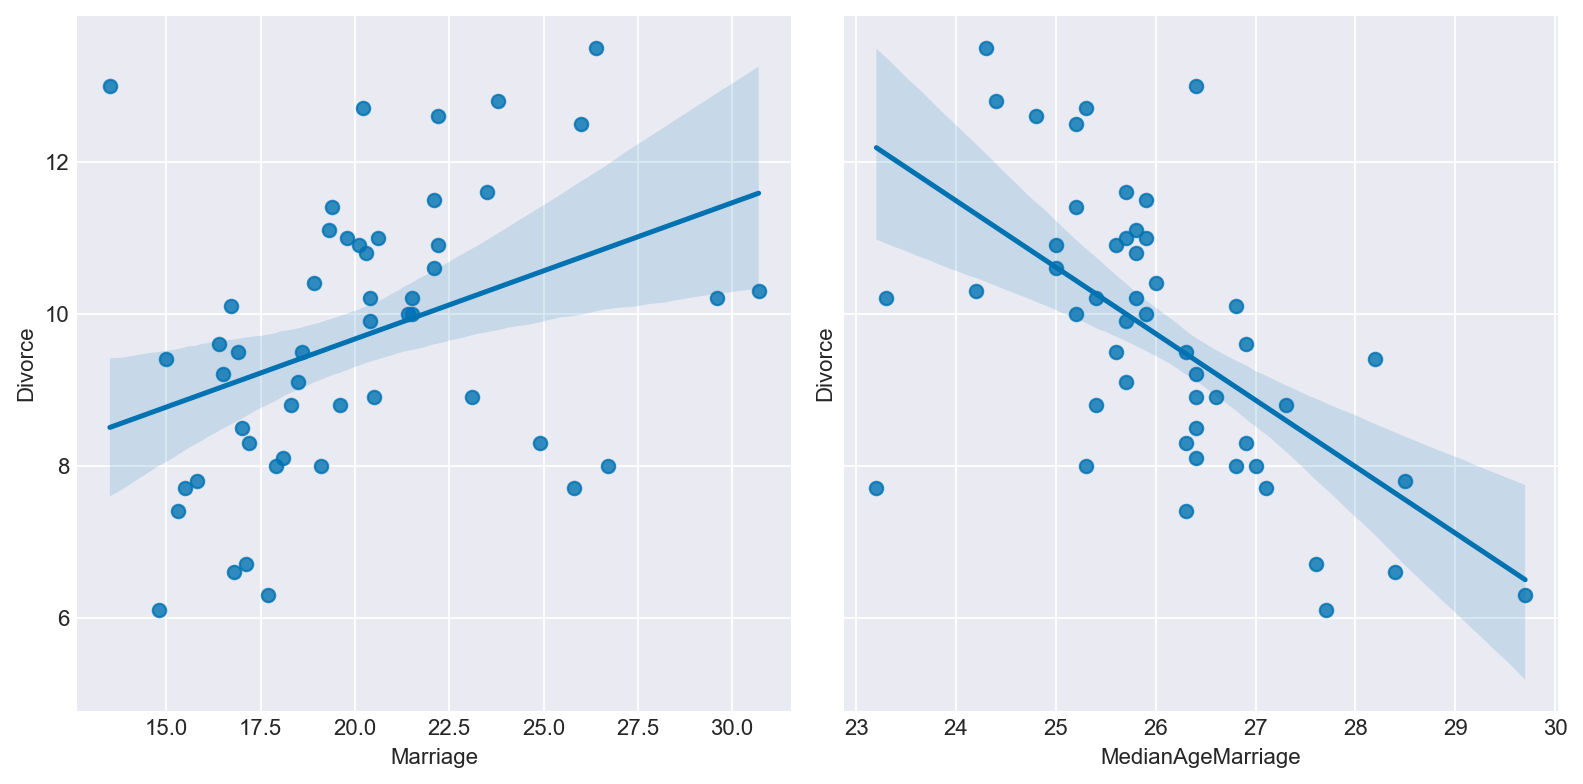

In [4]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5), dpi=80)

sns.regplot(data=d, x="Marriage", y="Divorce", ci=89, ax=axes[0])
sns.regplot(data=d, x="MedianAgeMarriage", y="Divorce", ci=89, ax=axes[1])
fig.set_tight_layout(True)

In [50]:
with pm.Model() as model_5_1:
    a = pm.Normal("alpha", 0, 0.2)
    bA = pm.Normal("betaA", 0, 0.5)
    s = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", a + bA * d.MedianAgeMarriage_s)
    # mu = a + bA * d.MedianAgeMarriage_s
    D = pm.Normal("divorce", mu, s, observed=d.Divorce_s)
    trace_5_1 = pm.sample(1000, tune=1000)

/var/folders/5y/qjwg__qs30d10cqddlwnmbvm0000gn/T/ipykernel_11693/1236890723.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_5_1 = pm.sample(1000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, betaA, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [51]:
with model_5_1:
    samples = pm.sample_prior_predictive(var_names=["mu", "divorce"])

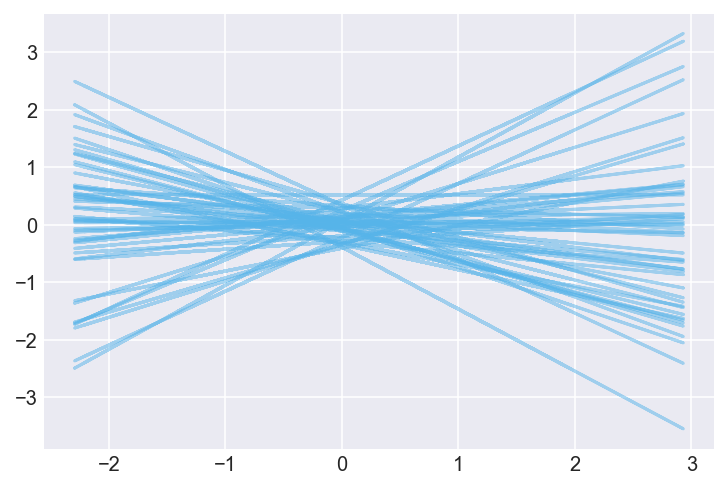

In [52]:
for i in range(50):
    plt.plot(d.MedianAgeMarriage_s, samples["mu"][i], c="C5", alpha=.5)

In [53]:
with pm.Model() as model_5_3:
    a = pm.Normal("alpha", 0, 0.2)
    bA = pm.Normal("betaA", 0, 0.5)
    bM = pm.Normal("betaM", 0, 0.5)
    s = pm.Exponential("sigma", 1)

    mu = pm.Deterministic("mu", a + bA * d.MedianAgeMarriage_s + bM * d.Marriage_s)

    D = pm.Normal("divorce", mu, s, observed=d.Divorce_s)
    trace_5_3 = pm.sample(1000, tune=1000)

/var/folders/5y/qjwg__qs30d10cqddlwnmbvm0000gn/T/ipykernel_11693/3161480796.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_5_3 = pm.sample(1000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, betaM, betaA, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [54]:
with model_5_3:
    print(az.summary(trace_5_3, var_names=["alpha", "betaA", "betaM", "sigma"], hdi_prob=0.89))

        mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha -0.001  0.101    -0.163      0.155      0.002    0.002    2937.0   
betaA -0.607  0.157    -0.855     -0.360      0.003    0.002    2340.0   
betaM -0.061  0.157    -0.317      0.180      0.003    0.003    2180.0   
sigma  0.827  0.086     0.682      0.951      0.002    0.001    2768.0   

       ess_tail  r_hat  
alpha    2779.0    1.0  
betaA    2256.0    1.0  
betaM    2375.0    1.0  
sigma    2576.0    1.0  


In [55]:
trace_5_3[0]

{'alpha': -0.03088478233224294,
 'betaA': -0.7199649344196726,
 'betaM': -0.17062980180843734,
 'sigma_log__': -0.31258436159261477,
 'sigma': 0.7315539112903385,
 'mu': array([ 4.01758650e-01,  1.99072258e-01,  1.07804918e-01,  7.02131115e-01,
        -4.17204264e-01,  2.19296189e-02, -7.90487173e-01, -4.81129239e-01,
        -2.03317977e+00, -9.12880451e-02, -3.09564992e-02, -7.35675055e-01,
         1.36590172e+00, -4.79075851e-01,  1.88160790e-01,  2.85460904e-01,
         4.90073296e-01,  6.01364960e-01,  3.64345159e-02,  6.59576568e-02,
        -6.70723386e-01, -1.25311142e+00, -6.88243734e-02,  4.29806382e-02,
         1.52732262e-01,  2.99965801e-01,  2.46566336e-01,  3.70822857e-01,
        -3.09378640e-01, -7.45046482e-01,  1.03312184e-01, -1.24014657e+00,
         1.61204383e-01,  1.09730918e-01, -2.89031113e-02,  7.61050009e-01,
         5.49188003e-02, -4.29142426e-01, -1.04349295e+00, -1.40708123e-01,
         2.32574786e-01,  4.95592724e-01,  4.01245303e-01,  1.13728561e

/var/folders/5y/qjwg__qs30d10cqddlwnmbvm0000gn/T/ipykernel_11693/2053519924.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot([trace_5_1, trace_5_3], var_names=["betaA", "betaM"], hdi_prob=0.95)
/Users/alvaro/miniforge3/envs/rethinking/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'95.0% HDI'}>], dtype=object)

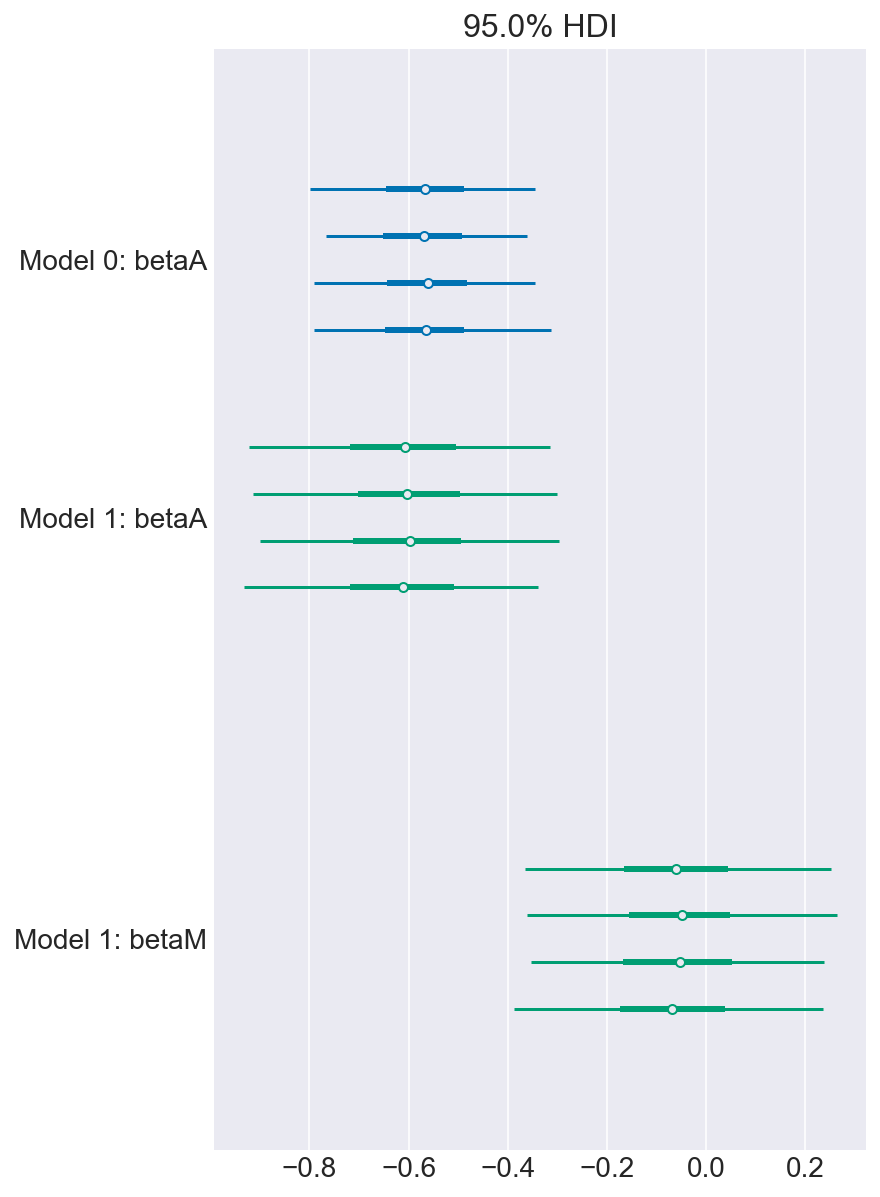

In [56]:
pm.forestplot([trace_5_1, trace_5_3], var_names=["betaA", "betaM"], hdi_prob=0.95)